#### Assignment=24.1
###### ML-04

In [1]:
## Import the necessary Library:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from sklearn import preprocessing

In [2]:
from pylab import rcParams

In [4]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic=pd.read_csv(url)

### Data Cleaning:

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.describe().transpose()  # just taking transpose for readiliblility

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
## Let see if the data have any missing values:
titanic.isnull().any().any(),titanic.shape

(True, (891, 12))

In [15]:
titanic.isnull().any()   # to see which columns are having null values.

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
#Now let’s try to find how many data points in each column are null.
titanic.isnull().sum(axis=0) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

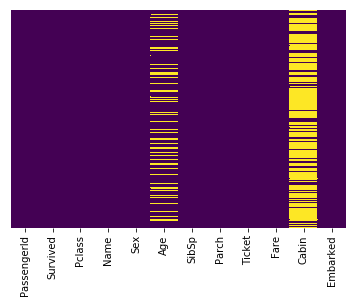

In [17]:
## let see this missing by heatmap
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## dark yellow color = is yes the column value have the missing value.
## we see some of age have missing value and cabin have lots missing value.

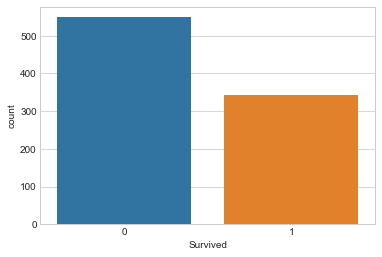

In [19]:
## more plot to check
sns.set_style ('whitegrid')
sns.countplot(x='Survived',data=titanic)
## 0=didn't survive   1=survived

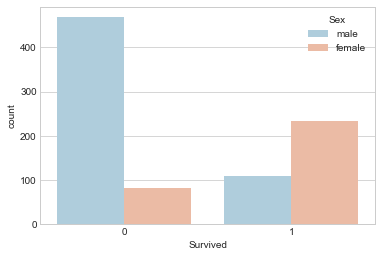

In [20]:
sns.countplot(x='Survived',data=titanic ,hue='Sex',palette='RdBu_r')
# palette=color=red blue and voilet

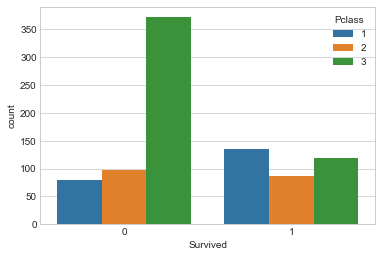

In [21]:
sns.countplot(x='Survived',data=titanic,hue='Pclass')

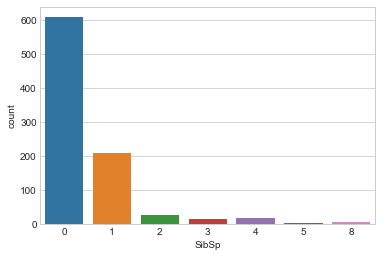

In [22]:
## let see sibling or spouse survive (sps)
sns.countplot(x='SibSp',data=titanic)

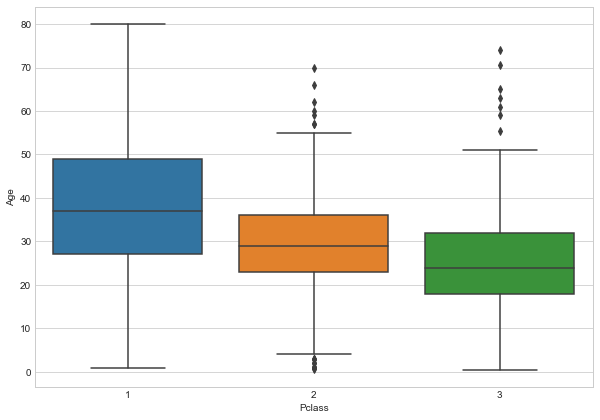

In [24]:
## let zoom in , to find the missing value and put it average value on it.
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [25]:
## let use all age and features to calculate the average age
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1] # second item index
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


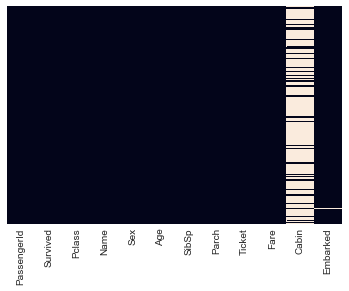

In [27]:
## let check to verify it : i.e null preseence or not
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)
## we just can see cabin column still have NaN value

In [28]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


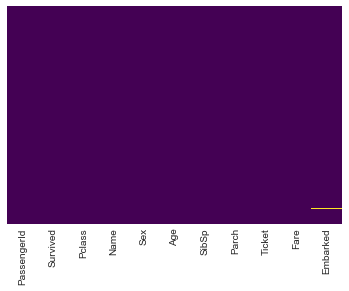

In [30]:
# let check more:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

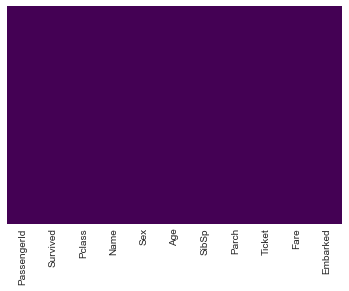

In [31]:
#Still have some yellow part (NaN value in column Embarked)
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## Now we have no missing value.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.

In [41]:
# Since the sex is a catergorical variable, so encoding categorical data:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
## it drops first column of female and only male column will be there.
# This avoids the dummy variable trap.

In [43]:
titanic=pd.concat([titanic,sex],axis=1)

In [46]:
# Setting the variables now:
X= titanic.drop(['Survived','Sex','PassengerId','Name','Ticket','Embarked'],axis=1)
y=titanic['Survived']

In [48]:
## the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [51]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  # initiliazation
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [52]:
##  Fitting Decision Tree classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
# Predicting the Test set results:
y_pred=classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[135  22]
 [ 29  81]]


             precision    recall  f1-score   support

          0       0.82      0.86      0.84       157
          1       0.79      0.74      0.76       110

avg / total       0.81      0.81      0.81       267



In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8089887640449438
